In [29]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import gzip
import json
import re
import os
import sys
import numpy as np
import pandas as pd
import sqlite3
from sqlite3 import Error
pd.options.display.float_format = '{:,}'.format

In [0]:
message = "civil engineering\history"
#message = "miss"

In [0]:
message1 =  message.split("\\")
#not_message = message.split("\\")[1]
if (len(message1)>1):
  message = message1[0]
  not_message = message1[1]
else:
  message = message1[0]
  not_message = ""

In [33]:
#not_message
message

'civil engineering'

In [0]:
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer


contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", \
                    "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", \
                    "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", \
                    "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", \
                    "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re

contractions, contractions_re = _get_contractions(contraction_dict)

def replace_contractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)


def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    text = replace_contractions(text)
    text = text.replace('\n',' ')
    text = text.replace('.','')
    text = text.replace(',','')


    return(text)

contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", \
                    "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", \
                    "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", \
                    "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", \
                    "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re

contractions, contractions_re = _get_contractions(contraction_dict)

def replace_contractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)

In [35]:
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [0]:
path_model  = '/content/gdrive/My Drive/Goodreads/models/'
path_data = '/content/gdrive/My Drive/Goodreads/data/'

def load_data(file_name):
    count = 0
    data = []
    with gzip.open(file_name) as fin:
        for l in fin:
            d = json.loads(l)
            count += 1
            data.append(d)
            
            if count % 10000 == 0:
                print(count, end=',\n')
            
            if count == 100000:
               break # just for test
            
            # break if reaches the 100th line
            #if (head is not None) and (count > head):
                #break
    return data

In [0]:
import pickle
from textwrap import wrap
import warnings

import matplotlib.pyplot as plt
from skimage import io

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sia

from gensim.models.doc2vec import Doc2Vec
from gensim.test.utils import get_tmpfile
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
from scipy import sparse

warnings.filterwarnings('ignore')

dv = Doc2Vec.load(path_model+"doc2vec_model")
tf = pickle.load(open(path_model+"tfidf_model.pkl", "rb"))
svd = pickle.load(open(path_model+"svd_model.pkl", "rb"))
svd_feature_matrix = pickle.load(open(path_model+"lsa_embeddings.pkl", "rb"))
doctovec_feature_matrix = pickle.load(open(path_model+"doctovec_embeddings.pkl", "rb"))
#reviews = load_data(os.path.join(path_data, 'goodreads_reviews_dedup.json.gz'))

DIR = '/content/gdrive/My Drive/Goodreads/data'
#reviews = pd.read_csv(os.path.join(DIR, 'df_reviews1000.csv'))
df_books = pd.read_csv(os.path.join(DIR, 'df_books_clean.csv'))
#df = pd.DataFrame(reviews)
df = pd.DataFrame(df_books)
hal = sia()

In [38]:
message_array = dv.infer_vector(doc_words=message.split(" "), epochs=200)
message_array = message_array.reshape(1, -1)
print(message_array)

[[ 0.7490415  -0.13736568 -0.63374543 -0.31385303 -0.30656457  0.37447315
  -0.4923972   0.24130467  0.34523872  0.03702847  0.6986591   0.433098
   0.38783333  0.48565224 -0.60781425 -1.0456669  -0.33274433  0.0761413
   0.10623559 -0.17112394 -1.1723174  -0.20162909 -1.3356019   0.6699758
  -0.48011214  0.35104305  0.39952725 -0.17719017  0.7218232  -0.62268245
  -0.23284021  0.63034016  1.2734859  -0.9538638  -0.92647177 -0.22784396
  -0.20415907 -0.18040769  0.37220722 -0.467316    0.27179223 -0.2565807
  -0.20666662 -0.1094732  -0.8418132   0.286181   -0.49886838 -0.7408672
  -0.73746586 -0.63920027  0.17448972  0.29684386  0.7088036  -1.156384
  -0.18774204 -0.06624723  0.2975867  -0.7497003   0.07142655 -0.10932428
   0.21390343  0.00447215  0.72004586 -0.16722693  0.22703001 -0.5159347
   0.4421058  -0.19056411 -0.24388932  0.36458656  0.7682543  -0.47757152
  -0.77137077  0.07845721 -0.6732684  -0.26395077 -0.04225623 -0.07395128
   0.03355493  0.7380246  -1.1785574   0.612585

In [39]:
message.split(" ")

['civil', 'engineering']

In [0]:
def get_message_sentiment(message):
  sentences = re.split('\.|\but',message)
  sentences = [x for x in sentences if x != ""]
  love_message = ""
  hate_message = ""
  for s in sentences:
    sentiment_scores = hal.polarity_scores(s)
    if sentiment_scores['neg'] > 0:
      hate_message = hate_message + s
    else:
      love_message = love_message + s
  return love_message, hate_message
      
      

def get_ensemble_similarity_scores(message):
  message = clean_text(message)
  bow_message_array = get_message_tfidf_embedding_vector(message)
  semantic_message_array = get_message_doctovec_embedding_vector(message)
  
  bow_similarity = get_similarity_scores(bow_message_array, svd_feature_matrix)
  semantic_similarity = get_similarity_scores(semantic_message_array, doctovec_feature_matrix)
  
  ensemble_similarity = pd.merge(semantic_similarity, bow_similarity, left_index=True, right_index=True)
  ensemble_similarity.columns = ["semantic_similarity", "bow_similarity"]
  ensemble_similarity['ensemble_similarity'] = np.sqrt(ensemble_similarity["semantic_similarity"] \
                                                      * ensemble_similarity["bow_similarity"])
  ensemble_similarity.sort_values(by="ensemble_similarity", ascending=False, inplace=True)
  return ensemble_similarity


def get_message_tfidf_embedding_vector(message):
  message_array = tf.transform([message]).toarray()
  message_array = svd.transform(message_array)
  message_array = message_array[:,0:100].reshape(1, -1)
  return message_array


def get_message_doctovec_embedding_vector(message):
  message_array = dv.infer_vector(doc_words=message.split(" "), epochs=200)
  message_array = message_array.reshape(1, -1)
  return message_array


def get_similarity_scores(message_array, embeddings):
  cosine_sim_matrix = pd.DataFrame(cosine_similarity(X=embeddings,Y=message_array,dense_output=True))
  cosine_sim_matrix.set_index(embeddings.index, inplace=True)
  cosine_sim_matrix.columns = ["cosine_similarity"]
  return cosine_sim_matrix


def get_dissimilarity_scores(message):
  message = clean_text(message)
  bow_message_array = get_message_tfidf_embedding_vector(message)
  semantic_message_array = get_message_doctovec_embedding_vector(message)
  
  dissimilarity = get_similarity_scores(bow_message_array, svd_feature_matrix)
  dissimilarity.columns = ["dissimilarity"]
  dissimilarity.sort_values(by="dissimilarity", ascending=False, inplace=True)
  return dissimilarity


def query_similar_books(message, n):
  
  love_message, hate_message = get_message_sentiment(message)
  
  similar_books = get_ensemble_similarity_scores(love_message)
  dissimilar_books = get_dissimilarity_scores(hate_message)
  dissimilar_books = dissimilar_books.query('dissimilarity > .3')
  similar_books = similar_books.drop(dissimilar_books.index)
  #similar_books = similar_books.drop(similar_books.ensemble_similarity == 0)
  
  return similar_books.head(n)

In [66]:
message = df.description[1]
print(message)
df.head()

Harry Potter's life is miserable. His parents are dead and he's stuck with his heartless relatives, who force him to live in a tiny closet under the stairs. But his fortune changes when he receives a letter that tells him the truth about himself: he's a wizard. A mysterious visitor rescues him from his relatives and takes him to his new home, Hogwarts School of Witchcraft and Wizardry.
After a lifetime of bottling up his magical powers, Harry finally feels like a normal kid. But even within the Wizarding community, he is special. He is the boy who lived: the only person to have ever survived a killing curse inflicted by the evil Lord Voldemort, who launched a brutal takeover of the Wizarding world, only to vanish after failing to kill Harry.
Though Harry's first year at Hogwarts is the best of his life, not everything is perfect. There is a dangerous secret object hidden within the castle walls, and Harry believes it's his responsibility to prevent it from falling into evil hands. But 

,average_rating,book_id,image_url,title,description,ratings_count,describ_clean
0,4.34,2767052,https://images.gr-assets.com/books/1447303603m...,"The Hunger Games (The Hunger Games, #1)",Winning will make you famous.\nLosing means ce...,4899965,win make famous losing mean certain death the ...
1,4.45,3,https://images.gr-assets.com/books/1474154022m...,Harry Potter and the Sorcerer's Stone (Harry P...,Harry Potter's life is miserable. His parents ...,4765497,harry potter's life miserable parent dead he i...
2,3.57,41865,https://images.gr-assets.com/books/1361039443m...,"Twilight (Twilight, #1)",About three things I was absolutely positive.\...,3941381,three thing absolutely positive first edward v...
3,4.26,2657,https://images.gr-assets.com/books/1361975680m...,To Kill a Mockingbird,The unforgettable novel of a childhood in a sl...,3255518,unforgettable novel childhood sleepy southern ...
4,3.89,4671,https://images.gr-assets.com/books/1490528560m...,The Great Gatsby,"THE GREAT GATSBY, F. Scott Fitzgerald's third ...",2758812,great gatsby scott fitzgerald's third book sta...


In [0]:
result = query_similar_books(message,10)
not_result = query_similar_books(not_message,10)

In [68]:
result

,semantic_similarity,bow_similarity,ensemble_similarity
"(27000, Lost in a Good Book (Thursday Next, #2), https://images.gr-assets.com/books/1419889476m/27000.jpg)",0.3531404733657837,0.4626149442594825,0.4041881497543926
"(13591296, The Secret of the Fortune Wookiee (Origami Yoda, #3), https://images.gr-assets.com/books/1334086312m/13591296.jpg)",0.47833406925201416,0.3035310574501456,0.38103706624749123
"(500743, The Wizard Heir (The Heir Chronicles, #2), https://images.gr-assets.com/books/1298426467m/500743.jpg)",0.32641279697418213,0.42950934436498184,0.3744293610558885
"(24814, It's a Magical World: A Calvin and Hobbes Collection, https://images.gr-assets.com/books/1437420710m/24814.jpg)",0.371381551027298,0.36744758371865816,0.3694093306383424
"(8152697, Wishin' and Hopin', https://images.gr-assets.com/books/1328017040m/8152697.jpg)",0.3567705452442169,0.3743227389103731,0.36544127798917636
"(9462775, The Last Little Blue Envelope (Little Blue Envelope, #2), https://images.gr-assets.com/books/1288297853m/9462775.jpg)",0.34313255548477173,0.3874597336406415,0.36462315964782366
"(13547289, Tales from a Not-So-Smart Miss Know-It-All (Dork Diaries, #5), https://images.gr-assets.com/books/1370064645m/13547289.jpg)",0.3879336714744568,0.3348940504887705,0.3604395629797884
"(18004320, The Last Ever After (The School for Good and Evil, #3), https://images.gr-assets.com/books/1421947451m/18004320.jpg)",0.38860654830932617,0.3225595094776783,0.35404623653199585
"(12822875, The Council of Mirrors (The Sisters Grimm, #9), https://images.gr-assets.com/books/1397787334m/12822875.jpg)",0.3958340287208557,0.31658920161340326,0.35400110045613226
"(6760780, The Grimm Legacy (The Grimm Legacy, #1), https://images.gr-assets.com/books/1317628126m/6760780.jpg)",0.38620179891586304,0.3201352528689298,0.3516202647094809


In [0]:
result = result[result.ensemble_similarity != 0]
not_result = not_result[not_result.ensemble_similarity != 0]

In [70]:
not_result

,semantic_similarity,bow_similarity,ensemble_similarity
"(2723, The Years of Rice and Salt, https://images.gr-assets.com/books/1419079388m/2723.jpg)",0.475112646818161,0.8744887588260472,0.6445778997286299
"(714380, The Discoverers: A History of Man's Search to Know His World and Himself, https://images.gr-assets.com/books/1321817832m/714380.jpg)",0.5741970539093018,0.4864525603330813,0.5285069791496534
"(43980, A History of the World in 10½ Chapters, https://images.gr-assets.com/books/1485925526m/43980.jpg)",0.43021219968795776,0.6492279967099035,0.5284939021063287
"(318742, The Souls of Black Folk, https://images.gr-assets.com/books/1309202855m/318742.jpg)",0.43581297993659973,0.6397274042982205,0.5280165777836084
"(93426, Genghis Khan and the Making of the Modern World, https://images.gr-assets.com/books/1320531289m/93426.jpg)",0.5437107682228088,0.5118401827862683,0.5275348509719759
"(73186, The Case for Christ, https://images.gr-assets.com/books/1448776489m/73186.jpg)",0.4789171814918518,0.550787233524429,0.5135966018980401
"(91017, Rubicon: The Last Years of the Roman Republic, https://images.gr-assets.com/books/1320470983m/91017.jpg)",0.4209390878677368,0.5965100805169626,0.5010932140796964
"(43805, Servant of the Bones, https://images.gr-assets.com/books/1312931293m/43805.jpg)",0.47696012258529663,0.5254746557144041,0.500630059230375
"(19802, A World Lit Only by Fire: The Medieval Mind and the Renaissance: Portrait of an Age, https://images.gr-assets.com/books/1258846760m/19802.jpg)",0.41381072998046875,0.6016701154529122,0.49897650213512307
"(1362, The Histories, https://images.gr-assets.com/books/1399225547m/1362.jpg)",0.373360276222229,0.6607366481543618,0.4966818070606797


In [0]:
true_result = []
for index in result.index:
    if index not in not_result.index:
        true_result.append(index)

book title: Lost in a Good Book (Thursday Next, #2)


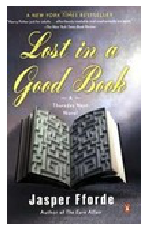

book title: The Secret of the Fortune Wookiee  (Origami Yoda, #3)


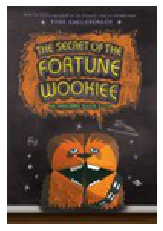

book title: The Wizard Heir (The Heir Chronicles, #2)


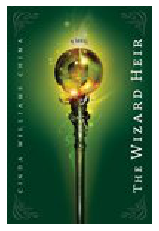

book title: It's a Magical World: A Calvin and Hobbes Collection


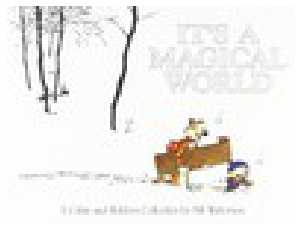

book title: Wishin' and Hopin'


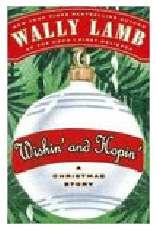

book title: The Last Little Blue Envelope (Little Blue Envelope, #2)


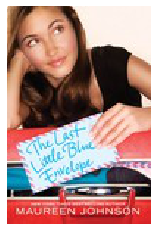

book title: Tales from a Not-So-Smart Miss Know-It-All (Dork Diaries, #5)


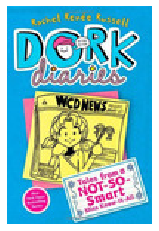

book title: The Last Ever After (The School for Good and Evil, #3)


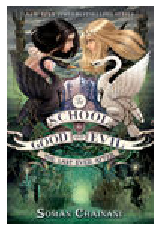

book title: The Council of Mirrors (The Sisters Grimm, #9)


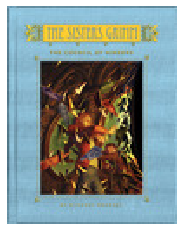

book title: The Grimm Legacy (The Grimm Legacy, #1)


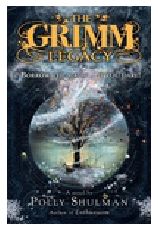

In [72]:
for index in true_result:
  print("book title:", index[1])
  #print("ratings:", index[2])
  book_image = index[2]
  image = io.imread(book_image)
  plt.imshow(image)
  plt.axis('off')
  plt.show()
